# Analysis of sold new cars in Estonia 2022

Data is taken from official source - https://www.transpordiamet.ee/soidukitega-tehtud-toimingute-statistika

Only new cars where used in this analysis.


## Initial data

In [1]:
%reload_ext autoreload
%autoreload 0

import os

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from mnt_sum import get_summary, COLUMNS, PRIVATE_CUSTOMER, COLUMN_SHORT_NAME, COLUMN_CUSTOMER, COLUMN_CITY
df_o = get_summary('data/2022')
df_o.describe()

,Esm reg aasta,Mootori võimsus,Mootori maht,CO2_NEDC,CO2_WLTP,Istekohti,Telgi kokku,Registrimass,Tühimass,Täismass,Arv
count,17304.0,17304.000000,17304.000000,7548.000000,16809.000000,17304.000000,17304.0,17304.000000,17304.000000,17304.000000,17304.000000
mean,2022.0,122.204363,1733.478907,130.481055,149.218157,5.183079,2.0,2157.930767,1685.153491,2157.932212,1.188222
std,0.0,59.227172,693.411253,45.773841,45.614287,0.753424,0.0,443.622466,386.027327,443.621194,1.188376
min,2022.0,18.600000,0.000000,0.000000,0.000000,2.000000,2.0,1039.000000,699.000000,1039.000000,1.000000
25%,2022.0,92.000000,1482.000000,109.000000,129.000000,5.000000,2.0,1860.000000,1434.000000,1860.000000,1.000000
50%,2022.0,110.000000,1598.000000,123.000000,142.000000,5.000000,2.0,2070.000000,1599.000000,2070.000000,1.000000
75%,2022.0,132.000000,1987.000000,150.000000,163.000000,5.000000,2.0,2320.000000,1805.000000,2320.000000,1.000000
max,2022.0,585.000000,6749.000000,456.000000,442.000000,9.000000,2.0,15000.000000,10030.000000,15000.000000,55.000000


In [3]:
df_o.head()

,Kategooria,Mark,Mudel,Keretüüp,Esm reg aasta,Mootori tüüp,Mootori võimsus,Mootori maht,Heitmenorm,Hübriidi tüüp,...,Värv,Maakond,Linn,Tüüp (isik),Arv,Kere nimetus,Käigukasti tüüp,Kütusekombinatsioon,name,short name
101,M1,ALPINA,BMW ALPINA D5 S ALLRAD,SEDAAN,2022,DIISEL,300.0,2993,EURO6,<NA>,...,HALL,HARJU MAAKOND,Tallinn,JURIIDILINE,1,<NA>,<NA>,<NA>,ALPINA BMW ALPINA D5 S ALLRAD,ALPINA BMW ALPINA D5 S ALLRAD
102,M1,AUDI,A1 SPORTBACK,LUUKPÄRA,2022,BENSIIN_KATALYSAATOR,70.0,999,EURO 6 AP,<NA>,...,VALGE,HARJU MAAKOND,Tallinn,JURIIDILINE,1,<NA>,<NA>,<NA>,AUDI A1 SPORTBACK,AUDI A1
103,M1,AUDI,A1 SPORTBACK,LUUKPÄRA,2022,BENSIIN_KATALYSAATOR,70.0,999,EURO 6 AP,<NA>,...,VALGE,HARJU MAAKOND,Tallinn,JURIIDILINE,1,<NA>,<NA>,<NA>,AUDI A1 SPORTBACK,AUDI A1
104,M1,AUDI,A1 SPORTBACK,LUUKPÄRA,2022,BENSIIN_KATALYSAATOR,70.0,999,EURO 6 AP,<NA>,...,VALGE,HARJU MAAKOND,Tallinn,JURIIDILINE,1,<NA>,<NA>,<NA>,AUDI A1 SPORTBACK,AUDI A1
105,M1,AUDI,A1 SPORTBACK,LUUKPÄRA,2022,BENSIIN_KATALYSAATOR,81.0,999,EURO 6 AP,<NA>,...,PUNANE,HARJU MAAKOND,Tallinn,JURIIDILINE,1,<NA>,<NA>,<NA>,AUDI A1 SPORTBACK,AUDI A1


In [4]:
df = df_o[COLUMNS]

df.head()

,Mark,Mudel,short name,Mootori tüüp,Mootori maht,Mootori võimsus,Linn,Tüüp (isik),Arv,Värv
101,ALPINA,BMW ALPINA D5 S ALLRAD,ALPINA BMW ALPINA D5 S ALLRAD,DIISEL,2993,300.0,Tallinn,JURIIDILINE,1,HALL
102,AUDI,A1 SPORTBACK,AUDI A1,BENSIIN_KATALYSAATOR,999,70.0,Tallinn,JURIIDILINE,1,VALGE
103,AUDI,A1 SPORTBACK,AUDI A1,BENSIIN_KATALYSAATOR,999,70.0,Tallinn,JURIIDILINE,1,VALGE
104,AUDI,A1 SPORTBACK,AUDI A1,BENSIIN_KATALYSAATOR,999,70.0,Tallinn,JURIIDILINE,1,VALGE
105,AUDI,A1 SPORTBACK,AUDI A1,BENSIIN_KATALYSAATOR,999,81.0,Tallinn,JURIIDILINE,1,PUNANE


## Add additional data

In [5]:
import yaml
from utils.file import read_file

SUVS = set(yaml.safe_load(read_file("data/suvs.yaml").lower()))

df['SUV'] = df[COLUMN_SHORT_NAME].str.lower().isin(SUVS)
df[df['SUV']].head(5)

/tmp/ipykernel_271641/968145016.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SUV'] = df[COLUMN_SHORT_NAME].str.lower().isin(SUVS)


,Mark,Mudel,short name,Mootori tüüp,Mootori maht,Mootori võimsus,Linn,Tüüp (isik),Arv,Värv,SUV
113,AUDI,E-TRON 55,AUDI E-TRON,ELEKTER,0,158.0,Määramata,JURIIDILINE,1,HALL,True
114,AUDI,E-TRON GT,AUDI E-TRON,ELEKTER,0,140.0,Tallinn,JURIIDILINE,1,PUNANE,True
115,AUDI,E-TRON GT,AUDI E-TRON,ELEKTER,0,140.0,Tallinn,JURIIDILINE,1,HALL,True
116,AUDI,E-TRON SPORTBACK 55,AUDI E-TRON,ELEKTER,0,158.0,Tallinn,JURIIDILINE,1,HALL,True
117,AUDI,E-TRON SPORTBACK 55,AUDI E-TRON,ELEKTER,0,158.0,Rakvere,JURIIDILINE,1,MUST,True


# Total sold cars

In [6]:
df['Arv'].sum()

20561

# Popular fuels

                       Arv
Mootori tüüp              
BENSIIN_KATALYSAATOR  9007
BENSIIN_HYBRIID       6295
DIISEL                3336
DIISEL_HYBRIID         920
ELEKTER                693
CNG                    285
BENSIIN                 25


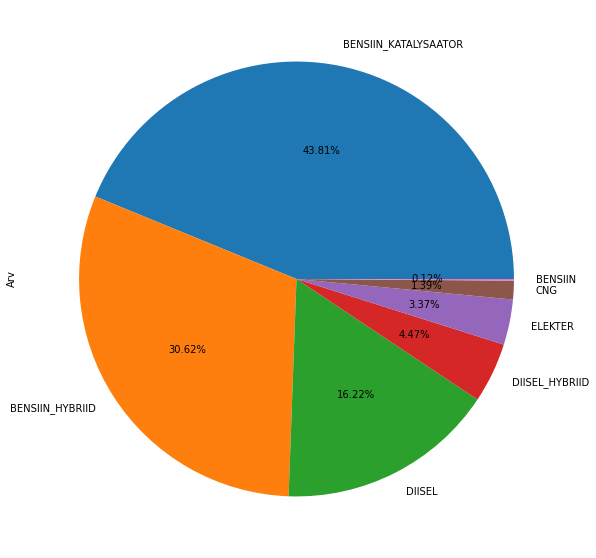

In [7]:
def show_pie(dataframe, groupby, index = None):
    plt.figure(figsize=(10, 10))
    dataframe = dataframe.groupby(
        [groupby], 
        as_index=False
    )['Arv'].sum().sort_values('Arv', ascending=False).reset_index(drop=True)
    if index:
        dataframe.index = index
    else:
        dataframe = dataframe.set_index(groupby)
    dataframe['Arv'].plot.pie(autopct='%1.2f%%')
    print(dataframe)

show_pie(df, 'Mootori tüüp')

# Popular colors

               Arv
Värv              
HALL          5349
MUST          3452
VALGE         3402
SININE        2080
PUNANE        1654
TUMEHALL       887
HÕBEDANE       845
ROHELINE       665
PRUUN          489
ORANŽ          390
BEEŽ           334
KOLLANE        214
TUMESININE     155
HELEHALL       153
TUMEPUNANE     111
LILLA           77
KULDNE          70
TUMEPRUUN       68
HELEPRUUN       47
TUMEROHELINE    37
HELEROHELINE    32
HELESININE      27
HELEBEEŽ        15
HELEBEEZ         6
TUMEKOLLANE      2


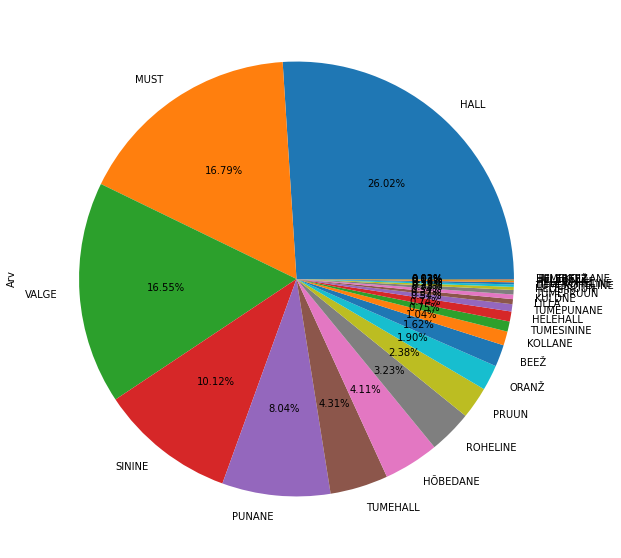

In [8]:
show_pie(df, 'Värv')

# Engine capacities

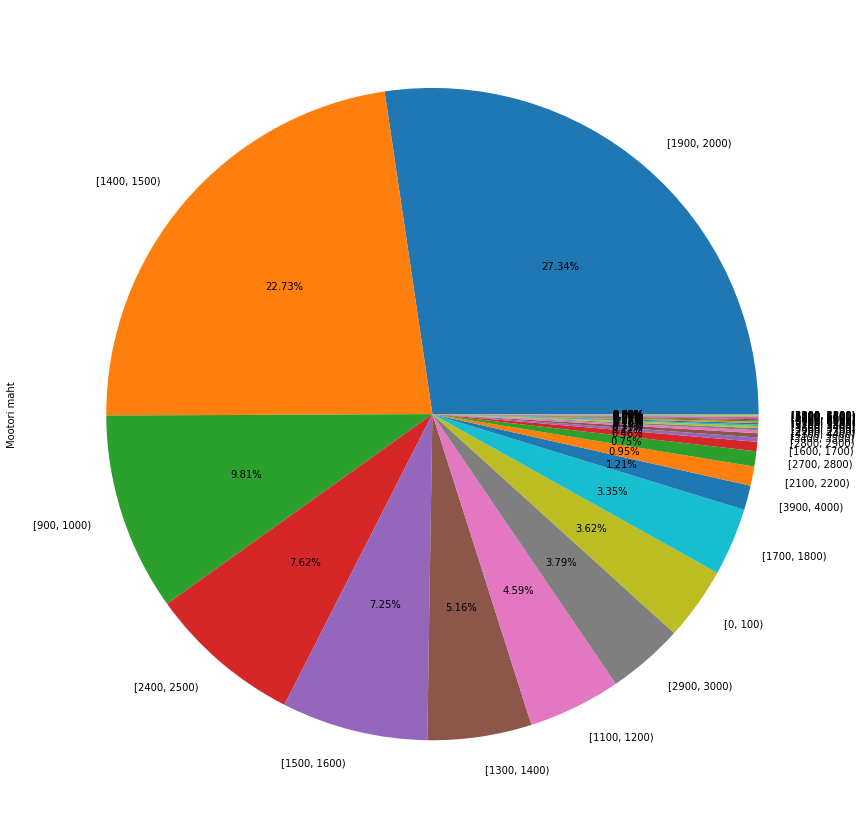

In [9]:
plt.figure(figsize=(15, 15))

bins = range(df['Mootori maht'].min(), df['Mootori maht'].max() + 100, 100)
capacities = pd.cut(df['Mootori maht'], bins, right=False).value_counts()
capacities.plot(kind='pie', autopct='%1.2f%%')
pass

# Top 10 popular manufacturers

             Mark   Arv
1          TOYOTA  4456
2           SKODA  2769
3             KIA  1636
4      VOLKSWAGEN  1595
5            AUDI  1000
6         PEUGEOT   816
7         RENAULT   784
8   MERCEDES-BENZ   746
9           DACIA   725
10        HYUNDAI   681


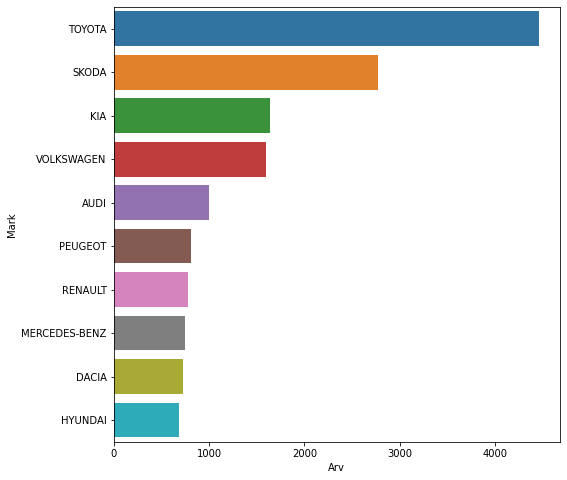

In [10]:
LIMIT = 10

def group_and_sort(data_frame, selection):
    return data_frame.groupby(
        selection, 
        as_index=False
    )['Arv'].sum().sort_values('Arv', ascending=False).reset_index(drop=True)

def group_sort_and_plot(data_frame, selection, x='Arv', y=None, limit=LIMIT, plot=True):
    data = group_and_sort(data_frame, selection)
    data.index += 1 
    y = selection[0] if y is None else y
    if plot:
        plt.figure(figsize=(8, 8))
        sns.barplot(x=x, y=y, data=data[:limit], orient='h')
    print(data.head(limit))
    
group_sort_and_plot(df, ['Mark'])

## Top 10 popular car models

            short name   Arv
1          TOYOTA RAV4  1526
2       TOYOTA COROLLA   966
3        SKODA OCTAVIA   888
4         SKODA KODIAQ   691
5         KIA SPORTAGE   641
6             KIA CEED   512
7   TOYOTA YARIS CROSS   498
8          TOYOTA C-HR   451
9    VOLKSWAGEN TIGUAN   369
10        DACIA DUSTER   347


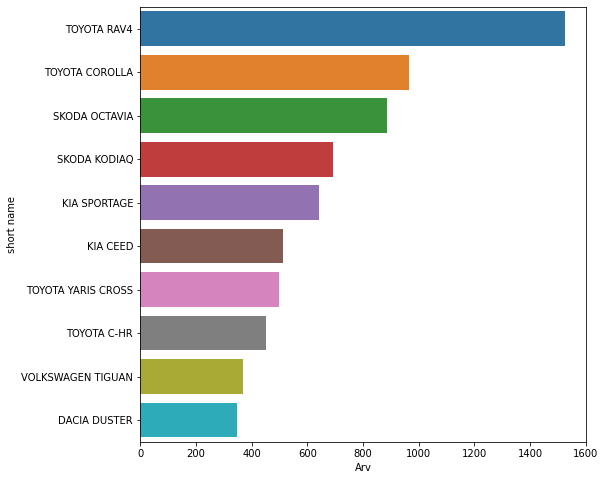

In [11]:
group_sort_and_plot(df, [COLUMN_SHORT_NAME])

### Top 10 popular diesel models

                          short name  Arv
1                       SKODA KODIAQ  358
2                      SKODA OCTAVIA  313
3                            AUDI Q3  179
4                      TOYOTA PROACE  171
5   TOYOTA LAND CRUISER (150 SERIES)  144
6             MERCEDES-BENZ V-KLASSE  131
7                       DACIA DUSTER  127
8                       PEUGEOT 5008  123
9                       PEUGEOT 2008   99
10                      PEUGEOT 3008   97


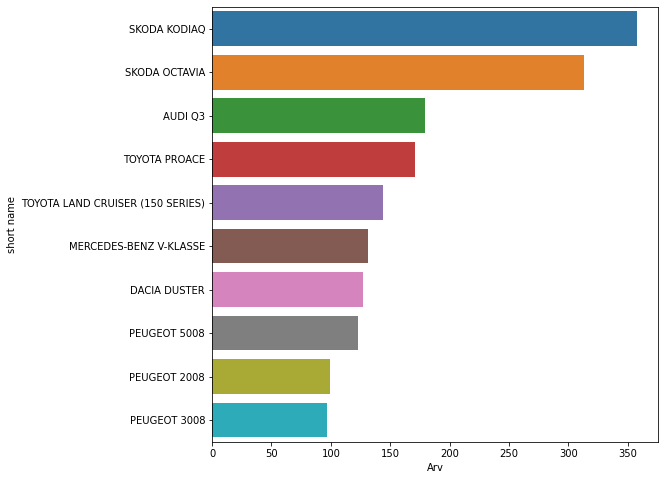

In [12]:
df_diesel = df[df['Mootori tüüp'] == 'DIISEL']

group_sort_and_plot(df_diesel, [COLUMN_SHORT_NAME])

### Top 10 popular petrol models

            short name  Arv
1          TOYOTA RAV4  777
2             KIA CEED  473
3       TOYOTA COROLLA  353
4   VOLKSWAGEN T-CROSS  339
5         SKODA KODIAQ  333
6       SUBARU OUTBACK  314
7     VOLKSWAGEN T-ROC  294
8    VOLKSWAGEN TIGUAN  249
9              AUDI Q2  228
10        DACIA DUSTER  220


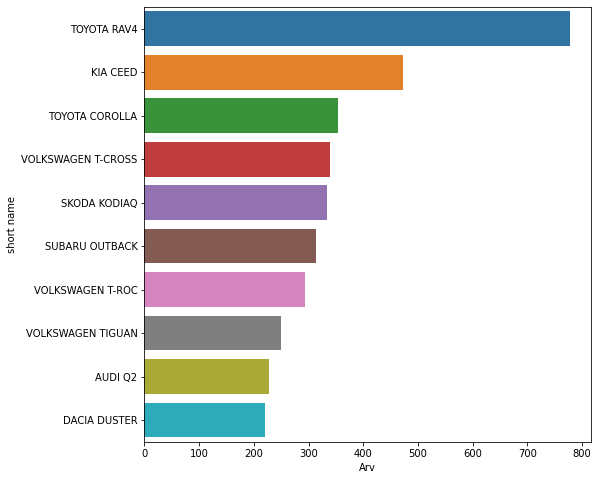

In [13]:
df_petrol = df[df['Mootori tüüp'].isin(['BENSIIN_KATALYSAATOR', 'BENSIIN'])]

group_sort_and_plot(df_petrol, [COLUMN_SHORT_NAME])

### Top 10 popular hybrid models(diesel and petrol)


            short name  Arv
1          TOYOTA RAV4  749
2       TOYOTA COROLLA  613
3         KIA SPORTAGE  456
4          TOYOTA C-HR  451
5       NISSAN QASHQAI  309
6   TOYOTA YARIS CROSS  287
7           HONDA CR-V  277
8        SKODA OCTAVIA  250
9       HYUNDAI TUCSON  249
10   TOYOTA HIGHLANDER  177


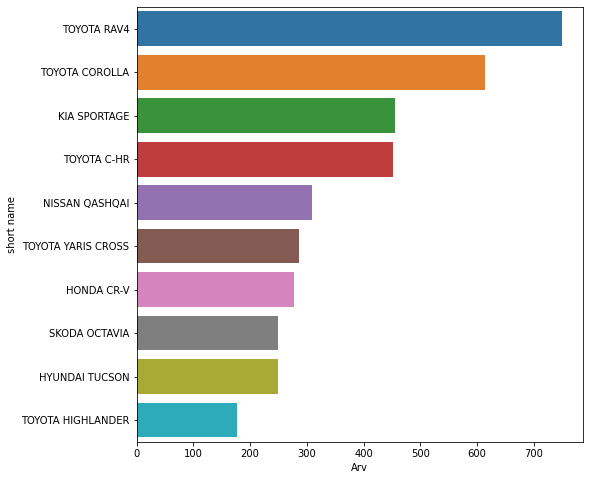

In [14]:
df_hybrids = df[df['Mootori tüüp'].apply(lambda x: 'HYBRIID' in x)]

group_sort_and_plot(df_hybrids, [COLUMN_SHORT_NAME])

### Top 10 popular electric models

           short name  Arv
1         AUDI E-TRON  117
2         SKODA ENYAQ   84
3      PORSCHE TAYCAN   45
4      HYUNDAI IONIQ5   43
5          VOLVO XC40   31
6        NISSAN ARIYA   26
7         RENAULT ZOE   26
8              BMW IX   24
9         NISSAN LEAF   24
10  MERCEDES-BENZ EQS   23


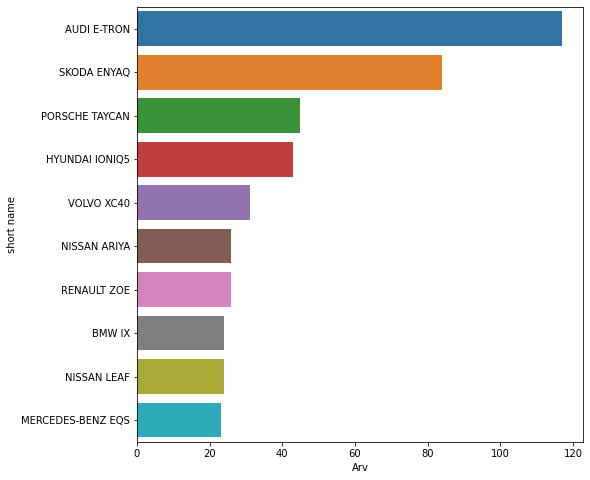

In [15]:
df_electric = df[df['Mootori tüüp'] == 'ELEKTER']

group_sort_and_plot(df_electric, [COLUMN_SHORT_NAME])

### Top 10 popular cars by private owners

            short name  Arv
1          TOYOTA RAV4  783
2         KIA SPORTAGE  350
3         SKODA KODIAQ  321
4       TOYOTA COROLLA  301
5   TOYOTA YARIS CROSS  293
6        SKODA OCTAVIA  289
7           HONDA CR-V  210
8             KIA CEED  210
9    VOLKSWAGEN TIGUAN  201
10      HYUNDAI TUCSON  198


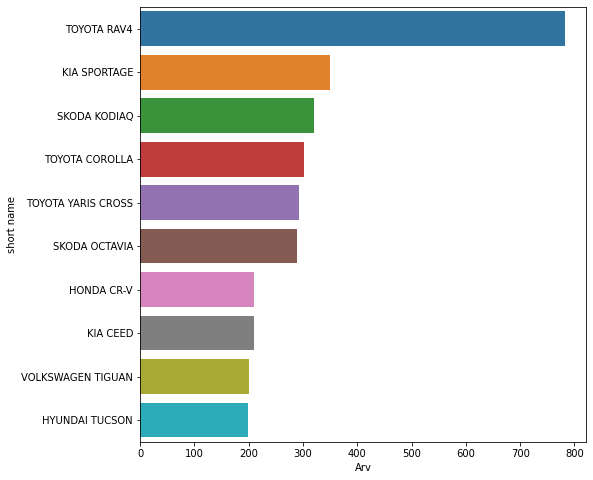

In [16]:
df_private = df[df[COLUMN_CUSTOMER].apply(lambda x: PRIVATE_CUSTOMER in x)]

group_sort_and_plot(df_private, [COLUMN_SHORT_NAME])

### Top 10 popular cars by company owners

          short name  Arv
1        TOYOTA RAV4  743
2     TOYOTA COROLLA  665
3      SKODA OCTAVIA  599
4       SKODA KODIAQ  370
5           KIA CEED  302
6       KIA SPORTAGE  291
7        TOYOTA C-HR  255
8            AUDI Q3  237
9   VOLKSWAGEN T-ROC  232
10           AUDI Q2  220


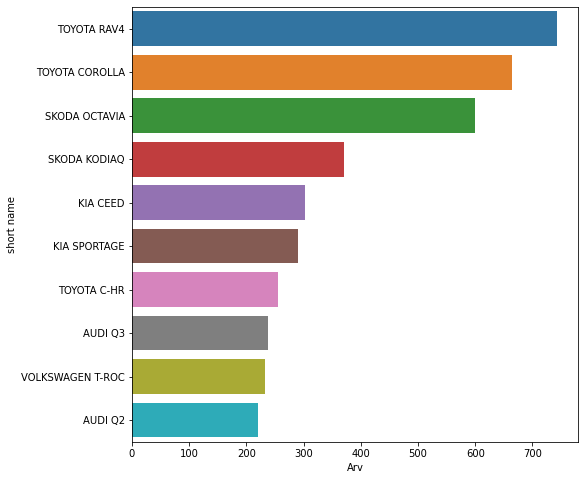

In [17]:
df_corporate = df[df[COLUMN_CUSTOMER].apply(lambda x: PRIVATE_CUSTOMER not in x)]

group_sort_and_plot(df_corporate, [COLUMN_SHORT_NAME])

### SUV vs non SUV

           SUV    Arv
non-SUV   True  10470
SUV      False  10091


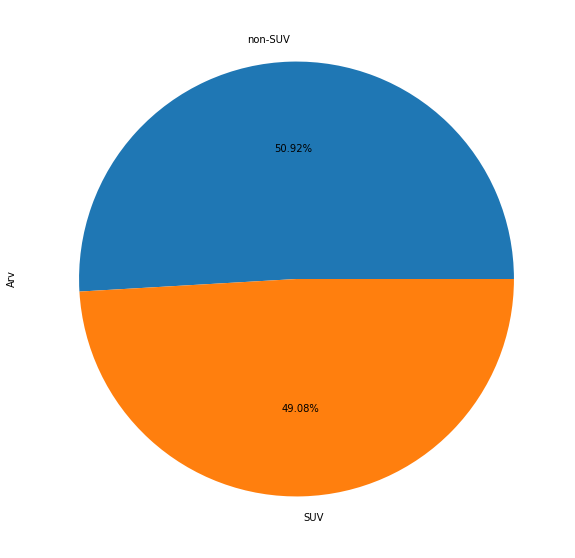

In [18]:
show_pie(df, 'SUV', index=['non-SUV', 'SUV'])

### Popular fuels in SUV

                       Arv
Mootori tüüp              
BENSIIN_KATALYSAATOR  4546
BENSIIN_HYBRIID       3959
DIISEL                1332
DIISEL_HYBRIID         345
ELEKTER                265
CNG                     22
BENSIIN                  1


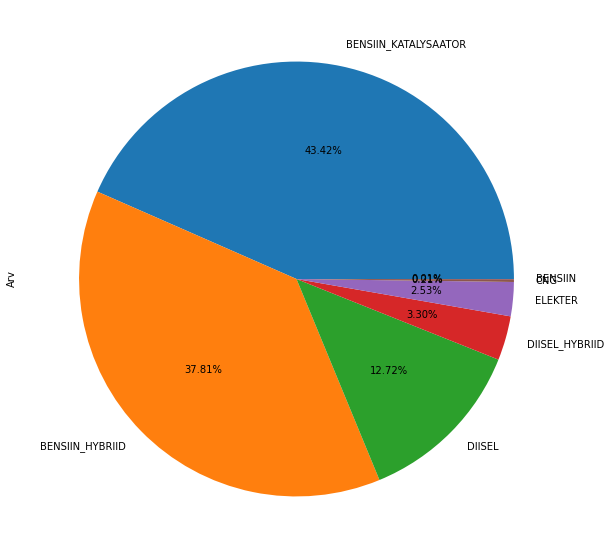

In [19]:
df_suv = df[df['SUV']]

show_pie(df_suv, 'Mootori tüüp')

### Top 10 popular SUV

            short name   Arv
1          TOYOTA RAV4  1526
2         SKODA KODIAQ   691
3         KIA SPORTAGE   641
4   TOYOTA YARIS CROSS   498
5          TOYOTA C-HR   451
6    VOLKSWAGEN TIGUAN   369
7         DACIA DUSTER   347
8   VOLKSWAGEN T-CROSS   339
9       NISSAN QASHQAI   309
10    VOLKSWAGEN T-ROC   301


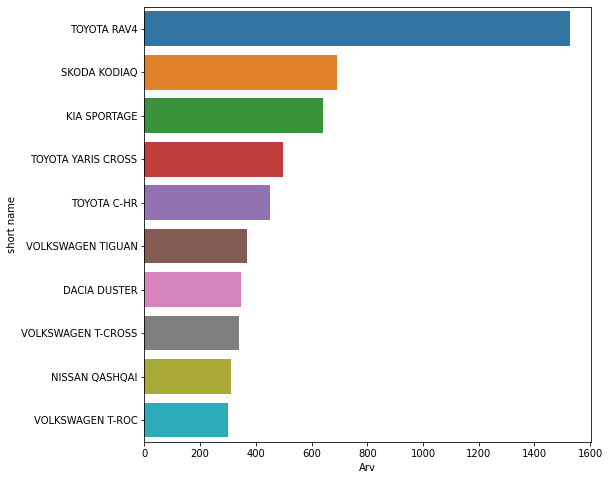

In [20]:
group_sort_and_plot(df_suv, [COLUMN_SHORT_NAME])

### Top 10 popular Diesel SUV

           short name  Arv
1        SKODA KODIAQ  358
2             AUDI Q3  179
3        DACIA DUSTER  127
4        PEUGEOT 5008  123
5        PEUGEOT 2008   99
6        PEUGEOT 3008   97
7   VOLKSWAGEN TIGUAN   93
8         SKODA KAROQ   51
9         KIA SORENTO   30
10     RENAULT KOLEOS   23


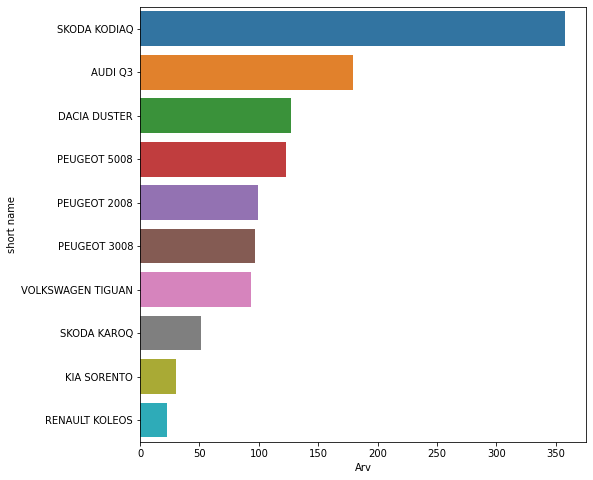

In [21]:
df_diesel_suv = df_diesel[df_diesel['SUV']]

group_sort_and_plot(df_diesel_suv, [COLUMN_SHORT_NAME])

### Top 10 popular Petrol SUV

            short name  Arv
1          TOYOTA RAV4  777
2   VOLKSWAGEN T-CROSS  339
3         SKODA KODIAQ  333
4     VOLKSWAGEN T-ROC  294
5    VOLKSWAGEN TIGUAN  249
6              AUDI Q2  228
7         DACIA DUSTER  220
8          SKODA KAROQ  212
9   TOYOTA YARIS CROSS  211
10        KIA SPORTAGE  173


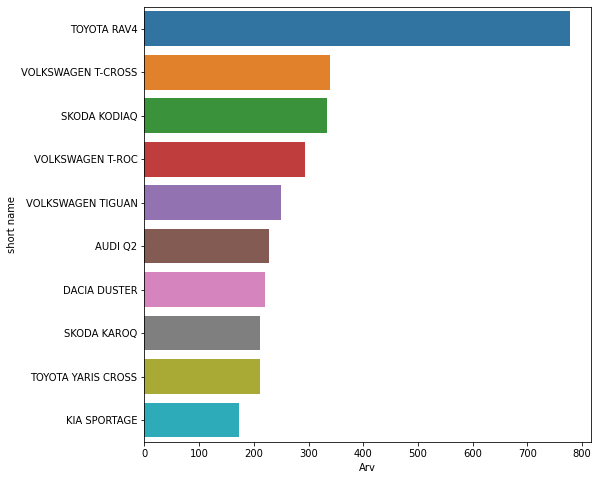

In [22]:
df_petrol_suv = df_petrol[df_petrol['SUV']]

group_sort_and_plot(df_petrol_suv, [COLUMN_SHORT_NAME])

### Top 10 popular hybrid SUV

            short name  Arv
1          TOYOTA RAV4  749
2         KIA SPORTAGE  456
3          TOYOTA C-HR  451
4       NISSAN QASHQAI  309
5   TOYOTA YARIS CROSS  287
6           HONDA CR-V  277
7       HYUNDAI TUCSON  249
8           VOLVO XC90  173
9       RENAULT ARKANA  157
10             AUDI Q5  112


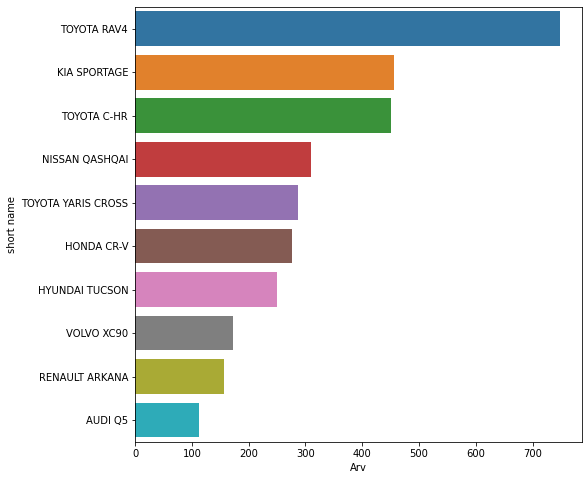

In [23]:
df_hybrid_suv = df_hybrids[df_hybrids['SUV']]

group_sort_and_plot(df_hybrid_suv, [COLUMN_SHORT_NAME])

### Most popular models per city

In [24]:
# Popular car per each city
cities = sorted(df[COLUMN_CITY].unique())

for city in sorted(cities):
    print()
    print(city)
    group_sort_and_plot(df[df[COLUMN_CITY] == city], [COLUMN_SHORT_NAME], limit=3, plot=False)


Haapsalu
     short name  Arv
1  KIA SPORTAGE    9
2   SKODA KAROQ    7
3      KIA CEED    6

Keila
       short name  Arv
1    SKODA KODIAQ    6
2  HYUNDAI TUCSON    6
3     TOYOTA RAV4    6

Kohtla-Järve
     short name  Arv
1   TOYOTA RAV4   17
2  KIA SPORTAGE   16
3      KIA CEED   10

Loksa
                 short name  Arv
1               TOYOTA RAV4    3
2  TOYOTA PROACE CITY VERSO    2
3          HYUNDAI SANTA FE    1

Maardu
      short name  Arv
1  SKODA OCTAVIA   29
2    TOYOTA RAV4   27
3   KIA SPORTAGE    9

Määramata
      short name  Arv
1    TOYOTA RAV4  433
2  SKODA OCTAVIA  338
3   SKODA KODIAQ  243

Narva
           short name  Arv
1         TOYOTA RAV4   39
2        KIA SPORTAGE   34
3  TOYOTA YARIS CROSS   13

Narva-Jõesuu
                         short name  Arv
1                       TOYOTA RAV4   13
2                    TOYOTA COROLLA    6
3  TOYOTA LAND CRUISER (150 SERIES)    5

Paide
          short name  Arv
1        TOYOTA RAV4    8
2     TOYOTA COROLLA   

# Top 3 for each mark

In [25]:
df_group = group_and_sort(df, ['Mark'])
marks = df_group.head(20)['Mark'].tolist()
df_group.set_index('Mark', inplace=True)

for mark in marks:
    models = df[df['Mark'] == mark]
    count = df_group.loc[mark, 'Arv']
    print(f"{mark} total: {count}")
    if not models.empty:
        print(f"Top 3 {mark} models")
        group_sort_and_plot(models, [COLUMN_SHORT_NAME], limit=3, plot=False)
        print()

TOYOTA total: 4456
Top 3 TOYOTA models
           short name   Arv
1         TOYOTA RAV4  1526
2      TOYOTA COROLLA   966
3  TOYOTA YARIS CROSS   498

SKODA total: 2769
Top 3 SKODA models
      short name  Arv
1  SKODA OCTAVIA  888
2   SKODA KODIAQ  691
3    SKODA KAROQ  263

KIA total: 1636
Top 3 KIA models
     short name  Arv
1  KIA SPORTAGE  641
2      KIA CEED  512
3   KIA PROCEED  138

VOLKSWAGEN total: 1595
Top 3 VOLKSWAGEN models
           short name  Arv
1   VOLKSWAGEN TIGUAN  369
2  VOLKSWAGEN T-CROSS  339
3    VOLKSWAGEN T-ROC  301

AUDI total: 1000
Top 3 AUDI models
    short name  Arv
1      AUDI Q3  251
2      AUDI Q2  229
3  AUDI E-TRON  117

PEUGEOT total: 816
Top 3 PEUGEOT models
     short name  Arv
1  PEUGEOT 2008  224
2  PEUGEOT 3008  147
3  PEUGEOT 5008  147

RENAULT total: 784
Top 3 RENAULT models
       short name  Arv
1    RENAULT CLIO  179
2  RENAULT ARKANA  157
3  RENAULT CAPTUR  153

MERCEDES-BENZ total: 746
Top 3 MERCEDES-BENZ models
               short n